In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
#Classification
# features = 2
# samples = 100
# sigma1 = 0.5
# mu1 = 4
# sigma2 = 0.5
# mu2 = 2
# totalSamples = 2*samples

# X1 = mu1 + np.random.randn(samples, features)*sigma1
# X2 = mu2 + np.random.randn(samples, features)*sigma2
# X = np.concatenate([X1, X2], axis =0)

# y1 = np.ones(samples)
# y2 = np.zeros(samples)
# y = np.concatenate([y1, y2])

# plt.figure(figsize = (10,6))
# plt.scatter(X[:,0], X[:,1], c = y)
# plt.ylabel('X2')
# plt.xlabel('X1')
# plt.title('Samples')

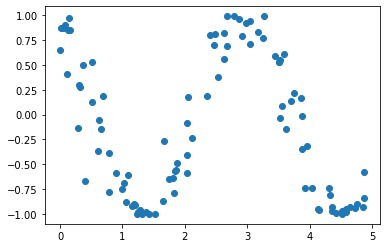

In [352]:
#Generating a Synthetic Data 
sigma = 0.3
mu = 1
n = 100
x = np.random.ranf(n)*5
y = np.sin(2*x+1+(sigma*np.random.randn(n)+mu))
X = x.reshape(n, 1)
y = y.reshape(n, 1)
totalSamples = len(X)
plt.scatter(x,y)

In [0]:
def sech2(u):
    return(((2/(np.exp(u)+np.exp(-u)))*(2/(np.exp(u)+np.exp(-u)))))

In [0]:
p = 3
out = 1
tol = 0.001
maxepocas = 2000
nepocas = 0
eta = 0.01

# X and Bias Matrix
Xaug = np.concatenate([X, np.ones((totalSamples, 1))], axis = 1)
row, col = Xaug.shape
# Layers
W = np.random.uniform(low = -0.5,high = 0.5, size = (col,p))
Z = np.random.uniform(low = -0.5, high = 0.6, size =((p+1), out)  )

In [0]:
while((nepocas <maxepocas)):
    print(f'Epochs {nepocas+1}\ {maxepocas}')
    for i in range(row):
        H = np.tanh(np.dot(Xaug[i,:],W))
        H = np.concatenate([H,[1]], axis = 0)
        H = H.reshape((1,(p+1)))
        y_hat = np.tanh(np.dot(H,(Z))).reshape(1,out)

        d_Z = (2*(y[i] - y_hat))* np.dot(np.dot(sech2(H),Z), H)

        a = sech2(np.dot(Xaug[i,:],W)).reshape(1,p)
        b =  (2*(y[i] - y_hat))
        c = ( np.dot(sech2(H), Z)*(Z[:-1,0]))
        d_W = (a * np.dot(b,c)) 
        d_W = np.dot(np.transpose(d_W), (Xaug[i,:]).reshape(1,col))

        Z += eta*np.transpose(d_Z)
        W += eta*np.transpose(d_W)

    nepocas+=1

In [0]:
# # Classification
# seqx1x2 = np.arange(0,6.2,0.2)
# cr = 0
# mz = np.zeros((len(seqx1x2),len(seqx1x2)))
# for i in range(len(seqx1x2)):
#     for j in range(len(seqx1x2)):
#         cr +=1
#         x1 = seqx1x2[i]
#         x2 = seqx1x2[j]
#         x1x2 = np.array([[x1,x2, 1]])
#         H = np.tanh(np.dot(x1x2[0,:],W))
#         H = np.concatenate([H,[1]], axis = 0)
#         H = H.reshape((1,(p+1)))

#         mz[i,j] = np.sign(np.dot(H,Z))

In [0]:

xran = (np.random.ranf(totalSamples)*5).reshape(totalSamples,1)
xran = np.concatenate([xran, np.ones((totalSamples, 1))], axis = 1)
Nrange = len(xran)
yhat = np.zeros(Nrange)
for i in range(Nrange):

        H = np.tanh(np.dot(xran[i,:],W))
        H = np.concatenate([H,[1]], axis = 0)
        H = H.reshape((1,(p+1)))

        yhat[i] = np.tanh(np.dot(H,(Z)))


Text(0, 0.5, 'Y')

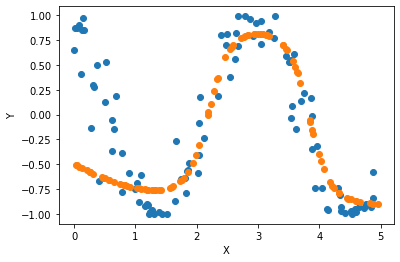

In [357]:
plt.scatter(X,y)
plt.scatter(xran[:,0], yhat)
plt.xlabel('X')
plt.ylabel('Y')